In [23]:
import matplotlib.pyplot as plt
import pandas as pd

obesity_df = pd.read_csv("obesity-ac-2006-2010censustracts.csv")

In [24]:
obesity_df.head()

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391


In [25]:
obesity_df = obesity_df[obesity_df["City Neighborhood"].notna()]
obesity_df

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
...,...,...,...,...,...,...,...,...
411,Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386
412,Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375
413,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487
414,Pennsylvania,42003981800,120300,NaN,PITTSBURGH,Pittsburgh,Lincoln-Lemington-Belmar,0.574293


In [26]:
cols = [i for i in list(obesity_df.columns) if i not in ["City Neighborhood", "2006-2010 estimate of obesity"]]
obesity_df = obesity_df.drop(columns = cols, axis = 1)
obesity_df

,City Neighborhood,2006-2010 estimate of obesity
0,Bluff,0.246936
1,Central Business District,0.668012
2,Strip District,0.369996
3,Crawford Roberts,0.488691
4,West oakland,0.366391
...,...,...
411,Chateau,0.439386
412,South Shore,0.354375
413,North Shore,0.121487
414,Lincoln-Lemington-Belmar,0.574293


In [39]:
neighborhood_dict = {}

for index,row in obesity_df.iterrows():
    if row["City Neighborhood"] in neighborhood_dict:
        neighborhoodlist = neighborhood_dict[row["City Neighborhood"]]
        neighborhoodlist[0] += 1
        neighborhoodlist[1] += float(row["2006-2010 estimate of obesity"])
    else:
        neighborhood_dict[row["City Neighborhood"]] = [1, float(row["2006-2010 estimate of obesity"])]

for neighborhood in neighborhood_dict:
    avg = (neighborhood_dict[neighborhood][1] / neighborhood_dict[neighborhood][0])
    neighborhood_dict[neighborhood] = avg
        
print(neighborhood_dict)

{'Bluff': 0.246935849, 'Central Business District': 0.668012041, 'Strip District': 0.369996439, 'Crawford Roberts': 0.488690884, 'West oakland': 0.366390731, 'North oakland': 0.155867454, 'Central Oakland': 0.1286682725, 'South Oakland': 0.281331416, 'Middle Hill': 0.608099152, 'Upper Hill': 0.455786185, 'Bedford Dwellings': 0.636222228, 'Terrace Village': 0.674102919, 'Lower Lawrenceville': 0.319568655, 'Polish Hill': 0.320700606, 'Shadyside': 0.1277184482, 'Bloomfield': 0.2323515522, 'Friendship': 0.220125706, 'Central Lawrenceville': 0.2929394455, 'Stanton Heights': 0.325282558, 'Upper Lawrenceville': 0.33469413, 'Morningside': 0.275901608, 'Garfield': 0.5251173530000001, 'Highland Park': 0.230228514, 'East Liberty': 0.4299940795, 'Larimer': 0.5175594385, 'Homewood West': 0.565709871, 'Homewood North': 0.596424896, 'Homewood South': 0.6096966685, 'East Hills': 0.562136738, 'Squirrel Hill North': 0.12594131866666666, 'Point Breeze': 0.167494006, 'Point Breeze North': 0.357949761, 'Sq

In [57]:
neighborhood_obesity_df = pd.DataFrame(list(neighborhood_dict.items()), columns = ["neighborhood", "2006-2010 estimate of obesity"])
obesity_sorted = neighborhood_obesity_df.sort_values("2006-2010 estimate of obesity", ascending = True).head(10)

<Axes: xlabel='neighborhood'>

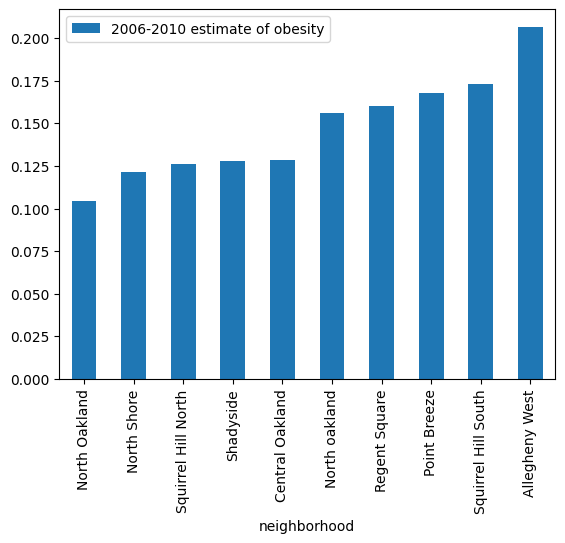

In [55]:
obesity_sorted.plot.bar(x = "neighborhood", y = "2006-2010 estimate of obesity")

In [56]:
least = obesity_sorted["2006-2010 estimate of obesity"].iloc[0]
least_neighborhood = obesity_sorted["neighborhood"].iloc[0]
print("The neighborhood with the smallest obesity rate is", least_neighborhood, "with", least)

The neighborhood with the smallest obesity rate is North Oakland with 0.1045791815
